## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [1]:
## Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Setting the max display options
pd.set_option('display.max_columns',230)
pd.set_option('display.max_rows',230)

## 01. Data Import

In [4]:
## Let's import the data into the notebook and check the dimension of the data
df_churn= pd.read_csv('telecom_churn_data.csv')

In [5]:
## Let's have a preview of the data
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
## Let's have a look at the shape of the data
df_churn.shape

(99999, 226)

In [7]:
## Let's check for the column info
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


In [8]:
## Let's try to get more insight of the numerical features
df_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
## Let's check for any duplicate data by mobile_number
original_rows = df_churn.shape[0]
print(df_churn.shape[0])
print(len(df_churn.mobile_number.unique()))

99999
99999


**Observation**
- We don't have any duplicate record in the dataset

In [10]:
## Let's check the features presents in the dataset
pd.DataFrame(df_churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


#### Observation
- The customer information represented by total 226 features in the dataset.
- We have total 99999 numbers of unique customer in the dataset

## 02. Data Cleaning

In [11]:
## Check the percentage of missing value in the dataset
100*round((df_churn.isnull().sum()/len(df_churn.index)),2)


mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

#### Observation
- We have good number of columns with higher missing values. Let's analysis further

In [12]:
## This method will return all the features with the missing values above a given threshold
def find_missing_values(df,threshold):
    missing = 100*(df.isnull().sum()/len(df.index))
    return missing.loc[missing>threshold]

In [13]:
## Let's check for the features with more than 50% missing values
df_missing_50=find_missing_values(df_churn,50)
df_missing_50

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [14]:
print('This dataset contains total {} features with more than 50% missing values'.format(len(df_missing_50)))

This dataset contains total 40 features with more than 50% missing values


#### Observation:
- If we look carefully at the high missing value features , many of them are important customer KPI's. Hence, essential for our analysis. So, we need to find a way to impute the missing values. Let's analysis further on the missing values.

In [15]:
## Let's look at the missing values for the customer KPI's and find a stategy to impute them
df_churn[list(df_missing_50.index)].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- We can see the huge range of values in the customer KPIs . We cannot simply impute them with **Mean/Median**. This will distort the whole scenario. It is safer to assume that the missing customer KPIs did not have any values in the respective month. Hence, We can impute them with 0.

In [16]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_50.index)].select_dtypes(include=['int64','float']).columns)
print(missing_KPIs)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [17]:
## This method with impute all the missing values with a specific values
def impute_nan(df, missing_cols, impute_value):
    for col in missing_cols:
        df[col].fillna(impute_value, inplace=True)

In [18]:
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [19]:
## Let's find further missing values > 50%
missing_cols=find_missing_values(df_churn , 50)
missing_cols.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

#### Observation:
- We have 4 high missing value features , which is not important for our analysis we can drop them.

In [20]:
## Let's drop thos columns
df_churn.drop(list(missing_cols.index),axis=1,inplace=True)

In [21]:
## Again check the shape of the dataset
df_churn.shape

(99999, 222)

In [22]:
## Let's check further for the other missing values
df_missing_5=find_missing_values(df_churn,5)
df_missing_5

onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou_9    7.745077
loc_og_mou_8        5.378054
loc_og_mou_9        7.745077
std_og_t2t_mou_8    5.378054
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_8    5.378054
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_8    5.378054
std_og_t2f_mou_9    7.745077
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_og_mou_8        5.378054
std_og_mou_9        7.745077
isd_og_mou_8        5.378054
isd_og_mou_9        7.745077
spl_og_mou_8        5.378054
spl_og_mou_9        7.745077
og_others_8         5.378054
og_others_9         7.745077
loc_ic_t2t_mou

In [23]:
print('We have total of {} feature with 5% or more missing values'.format(len(df_missing_5.index)))

We have total of 58 feature with 5% or more missing values


In [24]:
missingcol=list(df_missing_5.index)
df_churn[df_churn[missingcol].isnull().all(axis=1)][missingcol].shape

(4392, 58)

#### Observation:
- We have total 4392 customers with all these features are empty together

In [25]:
## Let's find out an imputation strategy for the missing values
df_churn[list(df_missing_5.index)].describe()

,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9
count,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.0,92254.0,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.0,92254.0,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000
mean,133.018098,130.302327,196.574803,190.337222,7.292981,6.343841,9.971890,8.555519,45.887806,44.584446,91.755128,90.463192,3.677991,3.655123,1.433821,1.232726,141.328209,138.709970,83.282673,82.342919,89.838390,86.276622,1.067792,1.042362,0.0,0.0,174.191498,169.664466,0.791247,0.723892,5.053769,4.412767,0.033372,0.047456,47.211362,46.281794,108.460515,106.155471,11.751834,12.173105,167.432575,164.619293,9.883921,9.432479,21.183211,19.620913,2.085004,2.173419,0.0,0.0,33.154735,31.229344,0.040361,0.163137,8.442001,8.063003,0.970800,1.017162
std,308.951589,308.477668,327.170662,319.396092,68.402466,57.137537,64.713221,58.438186,151.184830,147.995390,156.537048,158.681454,13.270996,13.457549,6.783335,5.619021,245.914311,245.934517,265.486090,267.184991,271.757783,261.407396,7.905971,8.261770,0.0,0.0,411.633049,405.138658,25.544471,21.310751,17.855111,16.328227,2.323464,3.635466,137.239552,140.130610,169.723759,165.492803,39.125379,43.840776,250.025523,249.845070,55.073186,53.376273,83.683565,74.913050,15.812580,15.978601,0.0,0.0,110.127008,101.982303,0.146147,0.527860,63.813098,63.505379,13.284348,12.381172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.460000,5.330000,31.630000,27.130000,0.000000,0.000000,0.000000,0.000000,1.600000,1.360000,9.810000,8.810000,0.000000,0.000000,0.000000,0.000000,17.110000,15.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.280000,3.290000,18.930000,18.560000,0.000000,0.000000,32.740000,32.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.360000,29.840000,92.140000,87.290000,0.000000,0.000000,0.000000,0.000000,11.730000,11.260000,40.360000,39.120000,0.000000,0.000000,0.000000,0.000000,63.730000,61.840000,0.000000,0.000000,3.310000,2.500000,0.000000,0.000000,0.0,0.0,10.410

#### Observation:
- Looking at the range of the data , it is safer to impute the missing values with 0.

In [26]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_5.index)].select_dtypes(include=['int64','float']).columns)
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [27]:
## Let's check further for the other missing values
df_missing_2=find_missing_values(df_churn,2)
df_missing_2

onnet_mou_6            3.937039
onnet_mou_7            3.859039
offnet_mou_6           3.937039
offnet_mou_7           3.859039
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_mou_6           3.937039
loc_og_mou_7           3.859039
std_og_t2t_mou_6       3.937039
std_og_t2t_mou_7       3.859039
std_og_t2m_mou_6       3.937039
std_og_t2m_mou_7       3.859039
std_og_t2f_mou_6       3.937039
std_og_t2f_mou_7       3.859039
std_og_t2c_mou_6       3.937039
std_og_t2c_mou_7       3.859039
std_og_mou_6           3.937039
std_og_mou_7           3.859039
isd_og_mou_6           3.937039
isd_og_mou_7           3.859039
spl_og_mou_6           3.937039
spl_og_m

In [28]:
missingcol=list(df_missing_2.index)
df_churn[df_churn[missingcol].isnull().all(axis=1)][missingcol].shape

(382, 60)

#### Observation:
- We have total 382 customers where we have total 60 features are missing together. Since ,this is very a small group of customers .We can remove them from our analysis

In [29]:
## We can drop them from the dataset and go for further analysis
df_churn=df_churn[~df_churn[missingcol].isnull().all(axis=1)]
df_churn.shape

(99617, 222)

In [30]:
## Let's find all the Customer KPI's that requires the imputation
missing_KPIs=list(df_churn[list(df_missing_2.index)].select_dtypes(include=['int64','float']).columns)
## Imputing the KPIs - with 0
impute_nan(df_churn,missing_KPIs,0 )

In [31]:
# Missing values per column expressed as % of total number of values
df_missing_0=find_missing_values(df_churn,0)
df_missing_0

loc_og_t2o_mou          0.639449
std_og_t2o_mou          0.639449
loc_ic_t2o_mou          0.639449
last_date_of_month_7    0.318219
last_date_of_month_8    0.753887
last_date_of_month_9    1.300983
date_of_last_rech_6     1.486694
date_of_last_rech_7     1.465613
date_of_last_rech_8     3.252457
date_of_last_rech_9     4.394832
dtype: float64

In [32]:
## Let's check for different values in the above columns
cols = list(df_missing_0.index)
for col in cols:
    print(col)
    print(df_churn[col].unique())    

loc_og_t2o_mou
[ 0. nan]
std_og_t2o_mou
[ 0. nan]
loc_ic_t2o_mou
[ 0. nan]
last_date_of_month_7
['7/31/2014' nan]
last_date_of_month_8
['8/31/2014' nan]
last_date_of_month_9
['9/30/2014' nan]
date_of_last_rech_6
['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
date_of_last_rech_7
['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
date_of_last_rech_8
['8/8/2014' 

In [33]:
## Some features above take one value only. Let's impute them with mode

for col in cols:
    if df_churn[col].nunique()==1:
         df_churn[col].fillna(df_churn[col].mode()[0], inplace=True)

In [34]:
# Missing values per column expressed as % of total number of values
df_missing_0=find_missing_values(df_churn,0)
df_missing_0.index

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [35]:
## The remaining features are dates of the last recharge. We can impute them with the last date of the respective months.
df_churn['date_of_last_rech_6'].fillna('6/30/2014',inplace=True)
df_churn['date_of_last_rech_7'].fillna('7/31/2014',inplace=True)
df_churn['date_of_last_rech_8'].fillna('8/31/2014',inplace=True)
df_churn['date_of_last_rech_9'].fillna('9/30/2014',inplace=True)


In [36]:
## Let's check if we have treated all the missing values
find_missing_values(df_churn,0)

Series([], dtype: float64)

#### Observation:
- We have eliminated all the missing values from the dataset

In [37]:
## Let's try to get an insight of the data after missing value treatment
df_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.961700e+04,99617.0,99617.0,99617.0,99617.0,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.00000,99617.000000,99617.000000,99617.000000,99617.00000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.0,99617.0,99617.0,99617.0,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.0

In [38]:
## As we can see there are few features with 0 value only , Like 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou' etc.
## Let's find out all the columns with value 0.

zero_columns=df_churn.columns[(df_churn == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [39]:
## Let's drop all the features with 0 values . Since, they are not important for the analysis.
# Let's remove these columns as well. All take a single value '0'. 
df_churn.drop(zero_columns,axis=1,inplace=True)

In [40]:
print('After missing value treatment:')
print('Total number of customers {}'.format(df_churn.shape[0]))
print('Total number of features {}'.format(df_churn.shape[1]))
print('Percentage of date retained after null value treatement {}%'.format( 100*(df_churn.shape[0]/original_rows)))

After missing value treatment:
Total number of customers 99617
Total number of features 211
Percentage of date retained after null value treatement 99.61799617996179%


#### standardize the data types 

In [41]:
## Find all the date columns
date_cols =  [col for col in df_churn.columns if 'date' in col ]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [42]:
for col in date_cols:
    df_churn[col] = pd.to_datetime(df_churn[col], format='%m/%d/%Y')

In [43]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99617 entries, 0 to 99998
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 161.1 MB


**We have converted all the object types to the standard data types**

#### Churn definition - (As given by the problem statement) 

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:
- Good phase wherein the customer is happy with the service
- Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn-
- Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. 

In [44]:
## Let's try to identify the high value customers

df_churn['total_data_rech_6'] = df_churn['total_rech_data_6'] * df_churn['av_rech_amt_data_6']
df_churn['total_data_rech_7'] = df_churn['total_rech_data_7'] * df_churn['av_rech_amt_data_7']

df_churn['amt_data_6'] = df_churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
df_churn['amt_data_7'] = df_churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

df_churn['AVG_amt_data_6_7'] = df_churn[['amt_data_6','amt_data_7']].mean(axis=1)

In [45]:
df_churn.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252

In [46]:
## Let's have a look at different quantile values for the recharge amount
df_churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.1,0.0,0.0,60.0
0.2,80.0,69.0,110.0
0.3,120.0,115.0,155.0
0.4,170.0,160.0,210.0
0.5,230.0,220.0,276.0
0.6,290.0,285.0,361.0
0.7,379.0,370.0,479.5
0.8,504.0,500.0,658.4
0.9,733.0,733.0,1030.0


**As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase).**

In [47]:
df_churn = df_churn[(df_churn['AVG_amt_data_6_7']>= df_churn['AVG_amt_data_6_7'].quantile(0.7))]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Columns: 216 entries, mobile_number to AVG_amt_data_6_7
dtypes: datetime64[ns](8), float64(173), int64(35)
memory usage: 49.5 MB


#### Churn customers

#### Identifying churn customers from the high value customers - using the following steps mentioned in the problem statement

Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [48]:
df_churn['churn_flag'] = np.where(
                            ((df_churn['total_ic_mou_9'] == 0.00) | (df_churn['total_og_mou_9'] == 0.00))
                            & ((df_churn['vol_2g_mb_9'] == 0.00) | (df_churn['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

In [49]:
## Let's check the newly derived column
df_churn['churn_flag'].value_counts()

0    26668
1     3238
Name: churn_flag, dtype: int64

In [50]:
## Percentage of churn customers
100*df_churn['churn_flag'].value_counts(normalize=True)

0    89.172741
1    10.827259
Name: churn_flag, dtype: float64

In [51]:
## Let's drop all features related to churn phase i.e. 9th month given in the problem statement
df_churn = df_churn.drop(df_churn.filter(regex='_9|sep', axis = 1).columns, axis=1)


In [52]:
## Let's check the new dataset
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Data columns (total 165 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   mobile_number         29906 non-null  int64         
 1   circle_id             29906 non-null  int64         
 2   last_date_of_month_6  29906 non-null  datetime64[ns]
 3   last_date_of_month_7  29906 non-null  datetime64[ns]
 4   last_date_of_month_8  29906 non-null  datetime64[ns]
 5   arpu_6                29906 non-null  float64       
 6   arpu_7                29906 non-null  float64       
 7   arpu_8                29906 non-null  float64       
 8   onnet_mou_6           29906 non-null  float64       
 9   onnet_mou_7           29906 non-null  float64       
 10  onnet_mou_8           29906 non-null  float64       
 11  offnet_mou_6          29906 non-null  float64       
 12  offnet_mou_7          29906 non-null  float64       
 13  offnet_mou_8   

## 03. Data Analysis

#### Let's try to find more insights into the data and find the patterns and relationships among the different features

### Churn flag :  Target variable , flags -  0 : Non-churn , 1: Churn

In [53]:
100*df_churn['churn_flag'].value_counts(normalize=True)

0    89.172741
1    10.827259
Name: churn_flag, dtype: float64

#### Observation: 
We can clearly see that the churn customers are ~11% only. So, we can infer that the dataset is an **imbalanced** one.

Please find the simple defination of imbalance dataset -

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

for more details please have a look at https://machinelearningmastery.com/what-is-imbalanced-classification/

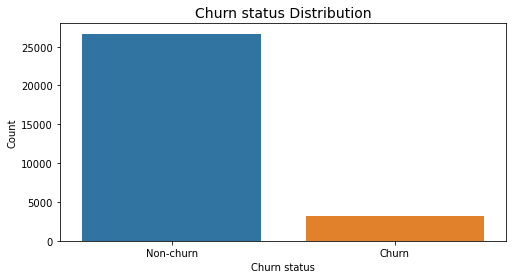

In [54]:
## Let's check the distribution

plt.figure(figsize=(8,4))
sns.countplot(data=df_churn, x='churn_flag', order=df_churn.churn_flag.value_counts().index)
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.xticks([0,1],['Non-churn','Churn'])
plt.title('Churn status Distribution',fontsize=14)
plt.show()

In [55]:
# There are some monthly features with jun_ , jul_, aug_ 
# We need to standarize them for EDA
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'

df_churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'}, inplace=True)

In [56]:
## Let's apply EDA on the features
## Find the monthly columns
all_monthly_features = []
for i in range(6,9):
    reg = '_'+str(i)
    cols=df_churn.filter(regex=(reg)).columns
    all_monthly_features.extend(cols)

all_monthly_features

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'total_data_rech_6',
 'amt_d

In [57]:
## Let's identify all the non-monthly features
# list of column which are not monthly columns
non_monthly_features = [col for col in df_churn.columns if col not in all_monthly_features ]
non_monthly_features

['mobile_number', 'circle_id', 'aon', 'churn_flag']

### MOBILE_NUMBER - Customer phone number

In [58]:
df_churn['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7001560797    1
7002001474    1
7000688705    1
7001669696    1
Name: mobile_number, dtype: int64

**We can infer that the mobile_number is an unique column, means it's repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis**

In [59]:
df_churn.drop('mobile_number', axis=1, inplace=True)

### CIRCLE_ID - Telecom circle area to which the customer belongs to

In [60]:
# Getting the distinct circle_id's in the data
df_churn.circle_id.value_counts()



109    29906
Name: circle_id, dtype: int64

Looks like the data at hand is only for a single circle_id 109.
We can remove this feature going forward as it is not contributing to analysis and model building.

In [61]:
df_churn.drop('circle_id',axis=1,inplace=True)

### AON - Age on network - number of days the customer is using the operator T network

In [62]:
df_churn['aon'].describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

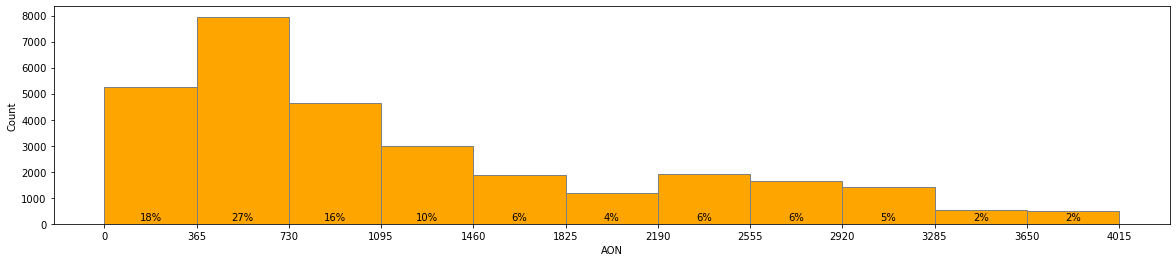

In [63]:
## The following method will draw the distributin plot based on the bin size
## We have took the reference from the followig article - https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
## We have labelled each bins with the percentage counts
def plot_distribution(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='orange', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()



plot_distribution(df_churn,'aon',365)

#### Observation:
 - Minimun Age on network is 180 days.
 - Average age on network for customers is 1200 days (3.2 years).
 - 27% of the HV users are in their 2nd year with the network.
 - Almost 71% users have Age on network less than 4 years.
 - 15% users are with the network from over 7 years.



In [64]:
#Create Derived categorical variable
df_churn['aon_bin'] = pd.cut(df_churn['aon'], range(0,df_churn['aon'].max(),365), labels=range(0,int(round(df_churn['aon'].max()/365))-1))

In [84]:
## This plot will show 
def distribution_by_churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    #print(colList)
    plt.plot(data.groupby('churn_flag')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return data.groupby('churn_flag')[colList].mean()

### APRU - Average revenue per user

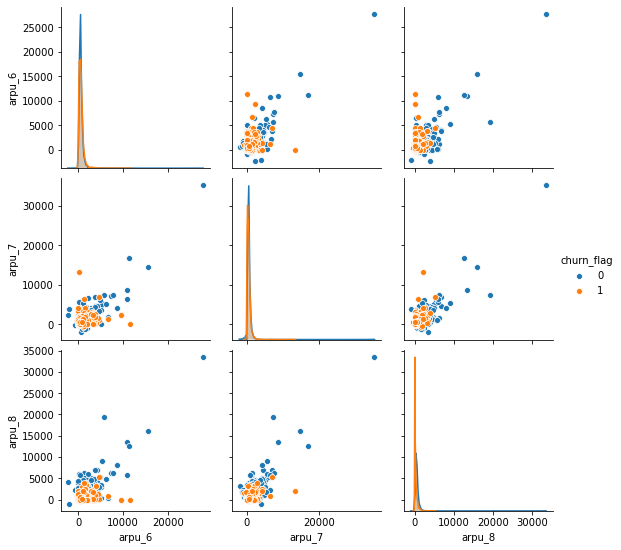

In [85]:
sns.pairplot(data=df_churn[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')
plt.show()

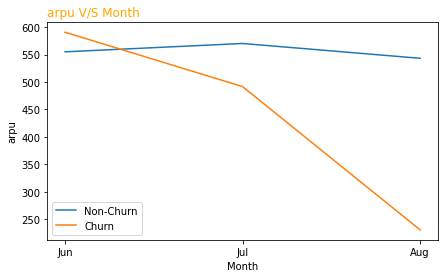

,arpu_6,arpu_7,arpu_8
churn_flag,,,
0,554.943196,570.134029,543.120971
1,590.622339,491.469208,230.268334


In [86]:
distribution_by_churn(df_churn,'arpu')

#### Observation:
- Average revenue per user,arpu also drops significantly for churners from month Jul(7) to Aug(8).
- While it remains almost consistent for the non-churners.



### onnet_mou - On network/ within the same network usage

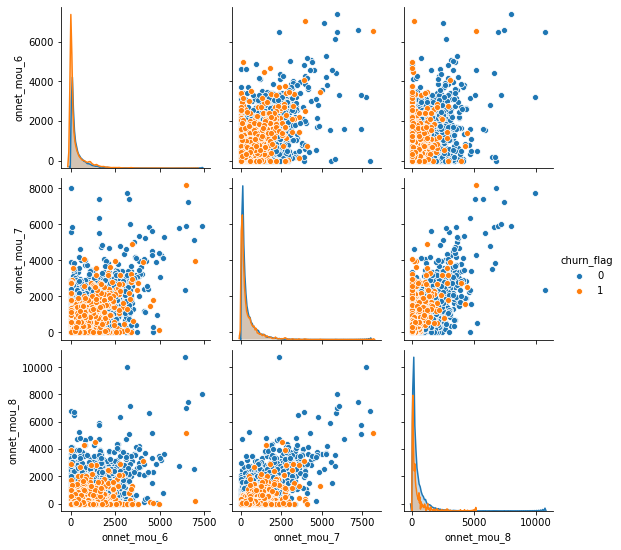

In [88]:
sns.pairplot(data=df_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')
plt.show()

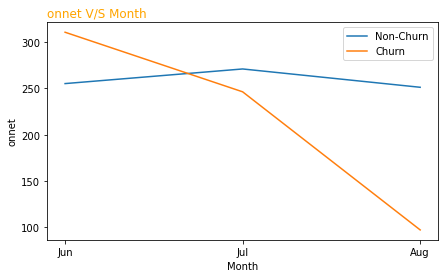

,onnet_mou_6,onnet_mou_7,onnet_mou_8
churn_flag,,,
0,255.167695,270.960438,251.178623
1,310.616637,246.286464,97.138823


In [89]:
distribution_by_churn(df_churn,'onnet')

#### Observation:
- Within the network monthly usage, onnet also drops significantly for churners from month Jul(7) to Aug(8).
- While it remains almost consistent for the non-churners.
